## Libraries Needed

In [1]:
import numpy as np
import sys
import os
import random
from joblib import Parallel, delayed
import multiprocessing
from scipy.stats import chi2
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
from IPython.core.debugger import Tracer

## Initialize arrays

In [2]:
num_samples = 1000
A_list = list()
B_list = list()
C_list = list()
def initialize_lists():
    A = np.random.normal(0,1,(32,512))
    B = np.random.normal(0,1,(512,32))
    C = np.dot(A,B).flatten()
    return [A, B, C]
    
all_data = list()
for i in range(num_samples):
    all_data.append(initialize_lists())


### For each sample, sample, calculate upper confidence interval of variance.


$$\bar{X} - \frac{t_{\frac{\alpha}{2},\;n-1}\;s}{\sqrt{n}} \leq \bar{X} \leq \bar{X} + \frac{t_{\frac{\alpha}{2},\;n-1}\;s}{\sqrt{n}}$$
The assumption underlying this CI is that we are sampling from a normal population. HOwever, the t distribution-based CI is relatively insenstivie or robust to this assumption.


$$\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},\;n-1}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{\frac{1-\alpha}{2},\;n-1}}$$
This CI is less robust to the normality assumption. The distribution of $(n-1)S^2/\sigma^2$ can be very different from the chi-square if the underlying population is not normal.


In [8]:
def get_stats_for_var_estimates(alpha, ns):
    act_var = list()
    est_var = list()
    res = list()
    for i in range(num_samples):
        act_var.append(np.var(all_data[i][2]))
        samples = np.random.choice(all_data[i][2], ns, replace = False)
        chi_val = chi2.isf(alpha, ns-1)
        est_var.append((ns-1)*np.var(samples)/chi_val)
        res.append(act_var[i] - est_var[i])
    return act_var, est_var, res

def plot_stat_graphs(alpha, ns):
    act_var, est_var, res = get_stats_for_var_estimates(alpha, ns)
    plt.figure()
    plt.hist(np.abs(res), 10, normed=0, facecolor='red', rwidth = 0.9)
    plt.title('Histogram of residuals')
    plt.figure()
    plt.hist(act_var, 10, normed=0, facecolor = 'blue', rwidth = 0.9)
    plt.title('Histogram of actual variances')
    plt.show()
    
#plot_stat_graphs(0.95,100)

## Explore how confidence and number of samples affect the residuals

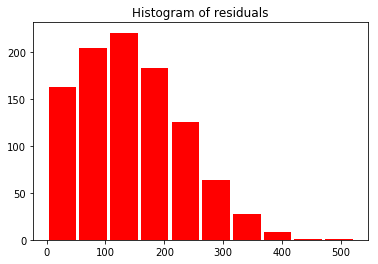

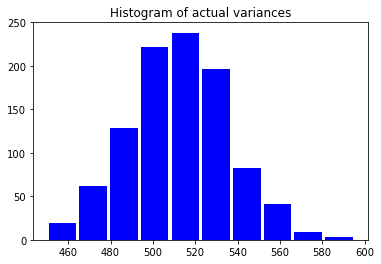

In [9]:
samp_size_widget = widgets.IntSlider(
    value=100,
    min=0,
    max=1024,
    step=10,
    description='Num_samples',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

alpha_widget = widgets.FloatSlider(
    value=0.95,
    min=0.7,
    max=0.99,
    step=0.01,
    description='alpha',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

interactive(plot_stat_graphs, alpha = alpha_widget, ns = samp_size_widget)